# Text Classification
Text Classification is an example of supervised machine learning task since a labelled dataset containing text documents and their labels is used for train a classifier. 

## Problem : To Automatically Classify The Text Documents into one or more Defined Categories. 

## End-to-End text classification Pipeline 

1. Dataset Preparation: The first step is the Dataset Preparation step which includes the process of loading a dataset and performing basic pre-processing. The dataset is then splitted into train and validation sets.
2. Feature Engineering: The next step is the Feature Engineering in which the raw dataset is transformed into flat features which can be used in a machine learning model. This step also includes the process of creating new features from the existing data.
3. Model Training: The final step is the Model Building step in which a machine learning model is trained on a labelled dataset.
4. Improve Performance of Text Classifier: Explore  different ways to improve the performance of text classifiers.

## Required Libraries

1. Pandas
2. Scikit-learn
3. XGBoost
4. TextBlob
5. Keras

# Install Packages

In [230]:
import sys
import pkgutil
from progressbar import ProgressBar

In [231]:
def install_packages(packages):
    pbar = ProgressBar()
    for pkg in pbar(packages):
        if not (pkgutil.find_loader(pkg)):
            print('Installing...',pkg)
            !{sys.executable} -m pip install $pkg 
        else:
            print(pkg," Already Installed")

In [232]:
def upgrade_packages(packages):
    pbar = ProgressBar()
    for pkg in pbar(packages):
        !{sys.executable} -m pip install --upgrade $pkg 

In [233]:
pkgs = ['pandas', 'sklearn',  'xgboost', 'textblob','tensorflow','keras']
install_packages(pkgs)
#upgrade_packages(pkgs)

pandas  Already Installed
sklearn  Already Installed
xgboost  Already Installed
textblob  Already Installed
tensorflow  Already Installed
keras  Already Installed


# Dataset preparation, feature engineering, model training 

In [234]:
# libraries for dataset preparation, feature engineering, model training 

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [235]:
# load the dataset
data = open('../../data/amazon_reviews_corpus').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(content[1])

# create a dataframe using texts and lables
trainDF = pandas.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels

In [236]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

# Feature Engineering

Raw text data is transformed into feature vectors and new features will be created using the existing dataset. 
In order to obtain relevant features from our dataset, following techniques will be explored

1. Count Vectors as features
2. TF-IDF Vectors as features
   * 2.1 Word level
   * 2.2 N-Gram level
   * 2.3 Character level
3. Word Embeddings as features
4. Text / NLP based features
5. Topic Models as features

## 1. Count Vectors as features
Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [237]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

## 2. TF-IDF Vectors as features
TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

* a. Word Level TF-IDF : Matrix representing tf-idf scores of every term in different documents
* b. N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams
* c. Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams in the corpus



In [238]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDF['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

## 3. Word Embeddings

A word embedding is a form of representing words and documents using a dense vector representation. 
The position of a word within the vector space is learned from text and is based on the words that surround 
the word when it is used. Word embeddings can be trained using the input corpus itself or can be 
generated using pre-trained word embeddings such as Glove, FastText, and Word2Vec.

There are four essential steps:

1. Loading the pretrained word embeddings
2. Creating a tokenizer object
3. Transforming text documents to sequence of tokens and pad them
4. Create a mapping of token and their respective embeddings

In [239]:
# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('../../data/wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(trainDF['text'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## Text / NLP based features
A number of extra text based features can also be created which sometimes are helpful for improving text classification models. Some examples are:

Word Count of the documents – total number of words in the documents
Character Count of the documents – total number of characters in the documents
Average Word Density of the documents – average length of the words used in the documents
Puncutation Count in the Complete Essay – total number of punctuation marks in the documents
Upper Case Count in the Complete Essay – total number of upper count words in the documents
Title Word Count in the Complete Essay – total number of proper case (title) words in the documents
Frequency distribution of Part of Speech Tags:
1. Noun Count
2. Verb Count
3. Adjective Count
4. Adverb Count
5. Pronoun Count

These features are highly experimental ones and should be used according to the problem statement only.

In [240]:
trainDF['char_count'] = trainDF['text'].apply(len)
trainDF['word_count'] = trainDF['text'].apply(lambda x: len(x.split()))
#trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [241]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'pron'))

# Model Training or Topic Models as features
Topic Modelling is a technique to identify the groups of words (called a topic) from a collection of documents that contains best information in the collection. I have used Latent Dirichlet Allocation for generating Topic Modelling Features. LDA is an iterative model which starts from a fixed number of topics. Each topic is represented as a distribution over words, and each document is then represented as a distribution over topics. Although the tokens themselves are meaningless, the probability distributions over words provided by the topics provide a sense of the different ideas contained in the documents. 

In [242]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

## Model Building
The final step in the text classification framework is to train a classifier using the features created in the previous step. There are many different choices of machine learning models which can be used to train a final model. We will implement following different classifiers for this purpose:

Naive Bayes Classifier
Linear Classifier
Support Vector Machine
Bagging Models
Boosting Models
Shallow Neural Networks
Deep Neural Networks
Convolutional Neural Network (CNN)
Long Short Term Modelr (LSTM)
Gated Recurrent Unit (GRU)
Bidirectional RNN
Recurrent Convolutional Neural Network (RCNN)
Other Variants of Deep Neural Networks


In [243]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

### 1 Naive Bayes
Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature 

In [244]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.706
NB, WordLevel TF-IDF:  0.7056
NB, N-Gram Vectors:  0.506
NB, CharLevel Vectors:  0.678


### 2 Linear Classifier
Implementing a Linear Classifier (Logistic Regression)

Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic/sigmoid function. 

In [245]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)

LR, Count Vectors:  0.7048
LR, WordLevel TF-IDF:  0.7052
LR, N-Gram Vectors:  0.5064
LR, CharLevel Vectors:  0.7032


### 3. Implementing a SVM Model
Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. The model extracts a best possible hyper-plane / line that segregates the two classes. 

In [246]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.5048


### 4 Bagging or Random Forest Model
Implementing a Random Forest Model

Random Forest models are a type of ensemble models, particularly bagging models. They are part of the tree based model family. 

In [247]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("RF, WordLevel TF-IDF: ", accuracy)

RF, Count Vectors:  0.6976
RF, WordLevel TF-IDF:  0.706


### 5 Boosting Model
Implementing Xtereme Gradient Boosting Model

Boosting models are another type of ensemble models part of tree based models. Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones. A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). 

In [248]:
# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print ("Xgb, CharLevel Vectors: ", accuracy)

Xgb, Count Vectors:  0.6424


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Xgb, WordLevel TF-IDF:  0.6412
Xgb, CharLevel Vectors:  0.6556


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 6 Shallow Neural Networks
A neural network is a mathematical model that is designed to behave similar to biological neurons and nervous system. These models are used to recognize complex patterns and relationships that exists within a labelled data. A shallow neural network contains mainly three types of layers – input layer, hidden layer, and output layer. 

In [249]:
def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    return classifier 

classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
accuracy = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
print("NN, Ngram Level TF IDF Vectors",  accuracy)

Epoch 1/1
7500/7500 [==============================] - 3s 358us/step - loss: 0.6902
NN, Ngram Level TF IDF Vectors 0.5048


### 7 Deep Neural Networks

Deep Neural Networks are more complex neural networks in which the hidden layers performs much more complex operations than simple sigmoid or relu activations. Different types of deep learning models can be applied in text classification problems.
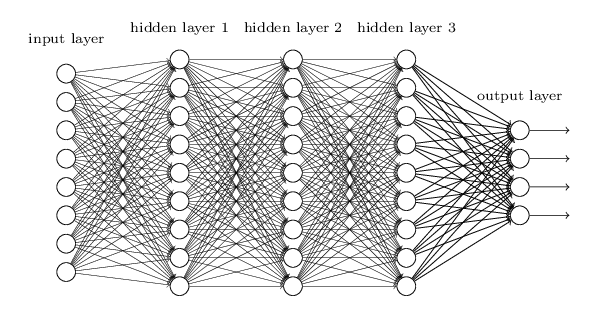

#### 7.1 Convolutional Neural Network
In Convolutional neural networks, convolutions over the input layer are used to compute the output. This results in local connections, where each region of the input is connected to a neuron in the output. Each layer applies different filters and combines their results.
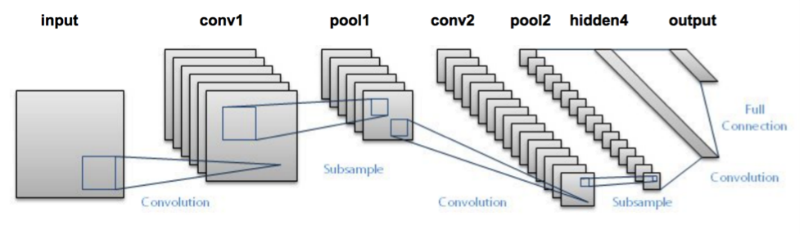

In [250]:
def create_convolutional_neural_network():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_convolutional_neural_network()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("Convolutional Neural Network, Word Embeddings",  accuracy)

Epoch 1/1
7500/7500 [==============================] - 6s 844us/step - loss: 0.5884
Convolutional Neural Network, Word Embeddings 0.5048


#### 7.2 Recurrent Neural Network – LSTM
Unlike Feed-forward neural networks in which activation outputs are propagated only in one direction, the activation outputs from neurons propagate in both directions (from inputs to outputs and from outputs to inputs) in Recurrent Neural Networks. This creates loops in the neural network architecture which acts as a ‘memory state’ of the neurons. This state allows the neurons an ability to remember what have been learned so far.

The memory state in RNNs gives an advantage over traditional neural networks but a problem called Vanishing Gradient is associated with them. In this problem, while learning with a large number of layers, it becomes really hard for the network to learn and tune the parameters of the earlier layers. To address this problem, A new type of RNNs called LSTMs (Long Short Term Memory) Models have been developed.
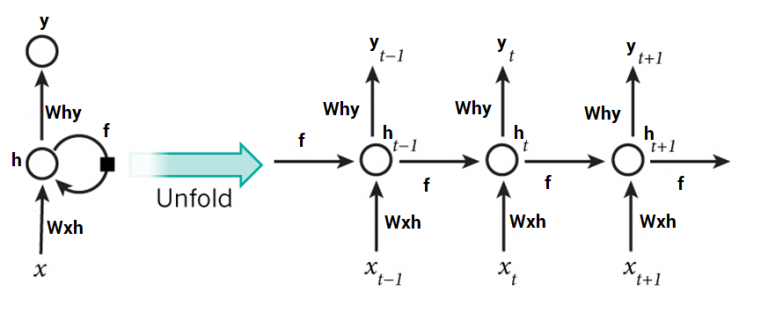

In [251]:
def create_rnn_lstm():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_lstm()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("RNN-LSTM, Word Embeddings",  accuracy)

Epoch 1/1
7500/7500 [==============================] - 21s 3ms/step - loss: 0.5927
RNN-LSTM, Word Embeddings 0.5048


#### 7.3 Recurrent Neural Network – GRU
Gated Recurrent Units are another form of recurrent neural networks. Lets add a layer of GRU instead of LSTM in our network.

In [252]:
def create_rnn_gru():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the GRU Layer
    lstm_layer = layers.GRU(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_gru()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("RNN-GRU, Word Embeddings",  accuracy)

Epoch 1/1
7500/7500 [==============================] - 18s 2ms/step - loss: 0.5905
RNN-GRU, Word Embeddings 0.5048


#### 7.4 Bidirectional RNN
RNN layers can be wrapped in Bidirectional layers as well. Lets wrap our GRU layer in bidirectional layer.

In [253]:
def create_bidirectional_rnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_bidirectional_rnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("RNN-Bidirectional, Word Embeddings",  accuracy)

Epoch 1/1
7500/7500 [==============================] - 22s 3ms/step - loss: 0.5869
RNN-Bidirectional, Word Embeddings 0.5048


#### 7.5 Recurrent Convolutional Neural Network
Once the essential architectures have been tried out, one can try different variants of these layers such as recurrent convolutional neural network. Another variants can be:

1. Hierarichial Attention Networks
2. Sequence to Sequence Models with Attention
3. Bidirectional Recurrent Convolutional Neural Networks
4. CNNs and RNNs with more number of layers


In [254]:
def create_rcnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    
    # Add the recurrent layer
    rnn_layer = layers.Bidirectional(layers.GRU(50, return_sequences=True))(embedding_layer)
    
    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rcnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("CNN, Word Embeddings",  accuracy)

Epoch 1/1
7500/7500 [==============================] - 6s 859us/step - loss: 0.5855
CNN, Word Embeddings 0.5048


# Tips to improve the performance of text classification models and this framework.

1. Text Cleaning : text cleaning can help to reducue the noise present in text data in the form of stopwords, punctuations marks, suffix variations etc. This [article](https://www.analyticsvidhya.com/blog/2014/11/text-data-cleaning-steps-python/) can help to understand how to implement text classification in detail.

2. Hstacking Text / NLP features with text feature vectors : In the feature engineering section, we generated a number of different feature vectros, combining them together can help to improve the accuracy of the classifier.

3. Hyperparamter Tuning in modelling : Tuning the paramters is an important step, a number of parameters such as tree length, leafs, network paramters etc can be fine tuned to get a best fit model.

4. Ensemble Models : Stacking different [models](https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/) and blending their outputs can help to further improve the results. 

[https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/](Refrence)

# Validation - Test Case

In [289]:
### Algorithm
algorithm = naive_bayes.MultinomialNB()


### Data Corpus (X & y)
X = xtrain_count
y = train_y

### Model
algorithm.fit(X, y)  

### Test Data
doc = ['God is love. I love God. There are 3 different APIs for evaluating the quality of a model’s predictions:']
test_data = count_vect.transform(doc)
#test_data = xvalid_count

### Predict Label for the Output Data
predictions = algorithm.predict(test_data)

print("Test Data ::",test_data)
print("Predictions ::",predictions)


Test Data ::   (0, 23)	1
  (0, 37)	1
  (0, 135)	1
  (0, 616)	1
  (0, 888)	1
  (0, 957)	2
  (0, 1107)	1
  (0, 1188)	1
  (0, 1354)	2
  (0, 1569)	1
  (0, 1767)	1
  (0, 1907)	1
  (0, 2208)	1
  (0, 2211)	1
Predictions :: [1]


In [290]:
accuracy = train_model(algorithm, X, y, xvalid_count)
print("Algorithm: ", algorithm)
print("Accuracy: ", accuracy)

Algorithm:  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Accuracy:  0.706
